# *DATA ANALYTICS - FEATURE ENGINEERING*

## 1. PROBLEM DEFINITION

**Objective**: Building a Machine Learning (ML) model that can predicts:
   *  The total income of clients based on the information provided in the loan application
   *  How capaple each loan applicant is in terms of repaying the loan
    
The provided dataset include two files: *training.csv* and *test.csv*

**Part 1** - ***Regression algorithms*** will be used to provide a prediction of client's total income. The output is the AMT_INCOME_TOTAL column in the dataset. ***Correlation*** (Pearson Correlation Coefficient) should be used as a metric for model performance and the minimum requirement is 0.20.

**Part 2** - ***Classifiers*** will be used to predict if a loan application should be approved or not. The ouput is the TARGET column in the dataset with the values of either 1 or 0. ***Accuracy*** is the model performance metric in this part and the minium requirement is 0.80.     

## 2. DATASET OVERVIEW

For feature engineering, only the training set will be explored in order to select the best features for the ML model. This will prevent the model from overfitting due to some data patterns in the test set. It is also aligned with real life scenarios when a ML model is deployed and has to perform with unknown test data.

First, the training set is imported into panda Dataframe and the first 5 rows are printed using the head() method.

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import os
from pathlib import Path
import sys
import csv
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy import stats

# Setting option to show all the columns
pd.set_option('display.max_columns', None) 

datasets_dir = Path('datasets')

training_file = datasets_dir / 'training.csv'

testing_file = datasets_dir / 'test.csv'

# Checking if the data files exist in the directory
if not os.path.exists(training_file) or not os.path.exists(testing_file):
    print('No data files in the directory, giving up...')
    sys.exit()

train_data = pd.read_csv(training_file)
test_data = pd.read_csv(testing_file)

In [2]:
train_data.shape

(108000, 122)

In [3]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,255237,0,Cash loans,F,N,Y,1,427500.0,1842768.0,177826.5,1800000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.046220,-15377,-745,-2249.0,-2788,NaN,1,1,0,1,0,1,Cooking staff,3.0,1,1,THURSDAY,14,0,0,0,0,0,0,Medicine,0.881467,0.735645,NaN,0.0082,NaN,0.9692,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0158,NaN,0.0088,NaN,0.0000,0.0084,NaN,0.9692,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0161,NaN,0.0091,NaN,0.0000,0.0083,NaN,0.9692,NaN,NaN,NaN,0.0690,0.0417,NaN,0.0160,NaN,0.0089,NaN,0.0000,NaN,block of flats,0.0077,Mixed,No,3.0,0.0,3.0,0.0,-577.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,12681,0,Cash loans,M,Y,N,0,135000.0,687600.0,18265.5,450000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.024610,-17163,-1019,-102.0,-719,0.0,1,1,0,1,0,0,Security staff,2.0,2,2,THURSDAY,12,0,0,0,0,1,1,Security,NaN,0.503512,0.810618,0.0170,0.0103,0.9727,0.6804,0.0035,0.00,0.0690,0.0417,0.0833,0.0032,0.0172,0.0106,0.0019,0.0008,0.0084,0.0000,0.9618,0.6014,0.0021,0.0000,0.0690,0.0417,0.0833,0.0000,0.0129,0.0055,0.0000,0.0000,0.0161,0.0000,0.9732,0.6847,0.0035,0.00,0.0690,0.0417,0.0833,0.0021,0.0175,0.0116,0.0019,0.0000,reg oper account,block of flats,0.0041,"Stone, brick",No,2.0,0.0,2.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,46342,0,Cash loans,M,Y,Y,0,315000.0,1067940.0,31356.0,765000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.019101,-9513,-498,-3847.0,-2176,4.0,1,1,0,1,0,0,NaN,2.0,2,2,TUESDAY,9,0,1,1,0,1,1,Industry: type 9,0.536909,0.691159,NaN,0.1649,0.1060,0.9876,0.8300,0.0307,0.16,0.1379,0.3750,0.2292,0.0543,0.1345,0.2124,0.2317,0.0000,0.1261,0.0849,0.9876,0.8367,0.0309,0.1208,0.1034,0.3750,0.0417,0.0547,0.1102,0.1369,0.0000,0.0000,0.1665,0.106

***Comments:***
1. The dataset has 108000 rows and 122 columns
2. Each row contains information of a loan application and is idetified by the loan ID number in the SK_ID_CURR
3. The description for each column are shown in the assignment specifications.

Next, using describe() method to get more information of the data, in particular the most frequent value and its frequency, the minimum and maximum values

In [4]:
# Summary information of all columns in the training set
train_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,108000.000000,108000.000000,108000,108000,108000,108000,108000.000000,1.080000e+05,1.080000e+05,107997.000000,1.079010e+05,107555,108000,108000,108000,108000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,36533.000000,108000.0,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,74679,108000.000000,108000.000000,108000.000000,108000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000,46862.000000,107771.000000,86048.000000,52222.000000,43886.000000,54324.000000,35534.000000,31931.000000,49517.000000,52627.000000,53280.000000,34134.000000,43054.000000,33611.000000,52834.000000,32446.000000,47364.000000,52222.000000,43886.000000,54324.000000,35534.000000,31931.000000,49517.000000,52627.000000,53280.000000,34134.000000,43054.000000,33611.000000,52834.000000,32446.000000,47364.000000,52222.000000,43886.000000,54324.000000,35534.000000,31931.000000,49517.000000,52627.000000,53280.000000,34134.000000,43054.000000,33611.000000,52834.000000,32446.000000,47364.000000,33467,52893,54890.000000,52120,55807,107682.000000,107682.000000,107682.000000,107682.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,92935.000000,92935.000000,92935.000000,92935.000000,92935.000000,92935.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Summary of columns regarding the number of days before the application
train_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,108000.000000,108000.000000,108000.000000,108000.000000
mean,-15947.660639,62031.638657,-4933.139111,-2970.579972
std,4364.182928,139705.501529,3507.956826,1509.693409
min,-25229.000000,-17583.000000,-23738.000000,-7197.000000
25%,-19584.000000,-2694.000000,-7389.000000,-4282.000000
50%,-15641.000000,-1186.500000,-4448.000000,-3205.000000
75%,-12293.000000,-298.000000,-1965.000000,-1687.000000
max,-7673.000000,365243.000000,0.000000,0.000000


***Comments:***
    
Some of the interesting statistics can be observed from the data set are as follows:
1. There are 2 types of contracts (namely cash loans and revolving loans) as specified in the NAME_CONTRACT_TYPE column, and 90.8% of them are Cash loans contract.
2. 64.9% of the applicants are female
3. Regarding the total income (AMT_INCOME_TOTAL), 25% of the applicants earn lower than 112500, while 50% have income lower than 144000 and 75% are lower than 202500.
4. The missing (NULL) values  are ignored in the count of the describe() method; therefore, it can be seen that there are 65 columns have missing values, which will be explored further below.
5. It is noticed that the maximum value for DAYS_EMPLOYED column is 365243, which is unsual compared to other columns, namely DAYS_BIRTH, DAYS_REGISTRATION and DAYS_ID_PUBLISH (which are either 0 or negative value). These columns are defined as the number of days before of the application, hence, a positive value does not make sense in this scenario. This could potentially be errors or outliers in the data set, which will need to be explored further below.

In addition, by observing the dataset, it is clear that the dataset includes both numerical and categorial data. The majority number of columns (106 columns) are numerical data while only 16 columns have categorial data. This information will affect the preprocessing methods to be used because of the difference in information between numerical and categorical attributes.

In [6]:
# Counting number of each data types in the dataset
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## 3. DATA VISUALISATION AND CORRELATIONS

### 3.1 Distribution of Output 

It is recomeneded to understand the distribution of the output over the dataset in order to choose suitable feature engineering techniques and corresponding ML models. 

For part 1, the AMT_INCOME_TOTAL column is the expected output, which can be seen as a continous variable due to its value be able to fit within a certain range.

According the previous summary table, it is observed that a major number of loan applicants have the total income under 250 thousands; therefore, to get a rough distribution, the histogram below only shows the number of applicants whose total income is less than 1 milliion.

<AxesSubplot:ylabel='Frequency'>

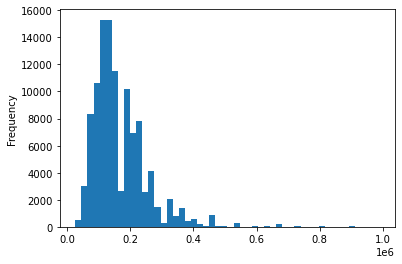

In [7]:
# Plotting the histogram of the AMT_INCOME_TOTAL
train_data['AMT_INCOME_TOTAL'].loc[train_data['AMT_INCOME_TOTAL'] < 1000000].plot.hist(bins = 50)

In [8]:
# Getting the skewness value of the AMT_INCOME_TOTAL
train_data[['AMT_INCOME_TOTAL']].skew().sort_values(ascending=False).iloc[:5]

AMT_INCOME_TOTAL    284.049221
dtype: float64

***Comments:***

As shown in the graph and the skewness value, the data is right skewed (i.e. imbalanced) which is pretty common for an income dataset. Such distribution, however, will have an impact on the performance of the ML model. The model tend to fit better or even overfit for the lower values which are dominating the dataset and it is prone to make errors for the higher values due to lack of samples.

For part 2, the TARGET column is the output which only has two class 1 (client with payment difficulties) and 0 (all other cases). The distribution of the target classes by will be explored by plotting the frequency of each class in the training data.

<AxesSubplot:ylabel='Frequency'>

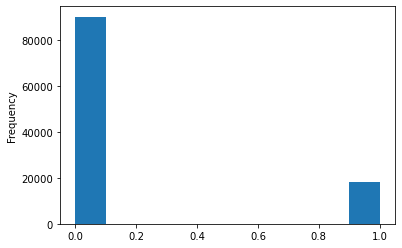

In [9]:
train_data['TARGET'].plot.hist()

In [10]:
target_df = train_data['TARGET'].value_counts().reset_index().rename(columns={'index': 'Target', 'TARGET': 'Count'})
target_df['Percent'] = (target_df[['Count']]/108000*100)

print(target_df)

   Target  Count    Percent
0       0  90000  83.333333
1       1  18000  16.666667


***Comments:***

As expected, the data for TARGET column is also imbalanced. There are more clients who repaid the loan on time accounted for 83.3% of the data (i.e. likely to have the loan approved) as compared to 16.67% of clients who have difficuties in making repayment. There are several techniques to deal with imbalanced classfication problems (such as resampling data or using penalised learning algorithms) that can be taken into consideration during the model training process.

## 3. PREPROCESSING DATA

### 3.1 Numerical Imputation

As aforementioned, there are quite significant amount of missing data in the training set. In order to determine an appropriate technique to handle these missing values, it is important to explore the percentage of how many values are missing in each columns. Below is the data frame of 15 columns that have the highest percentage of missing data.

In [11]:
missing_values_df = train_data.isna().sum().reset_index().rename(columns={"index": "Column", 0: 'Count'})
missing_values_df['Percent'] = (missing_values_df[['Count']]/len(train_data.index)*100)

print('The number of missing values for top 15 columns:')
missing_values_df.loc[missing_values_df['Count'] != 0].sort_values(ascending=False, by='Count').head(20)

The number of missing values for top 15 columns:


,Column,Count,Percent
76,COMMONAREA_MEDI,76069,70.434259
62,COMMONAREA_MODE,76069,70.434259
48,COMMONAREA_AVG,76069,70.434259
70,NONLIVINGAPARTMENTS_MODE,75554,69.957407
56,NONLIVINGAPARTMENTS_AVG,75554,69.957407
84,NONLIVINGAPARTMENTS_MEDI,75554,69.957407
86,FONDKAPREMONT_MODE,74533,69.012037
82,LIVINGAPARTMENTS_MEDI,74389,68.878704
54,LIVINGAPARTMENTS_AVG,74389,68.878704
68,LIVINGAPARTMENTS_MODE,74389,68.878704


It is noticed that the proportion of missing values is ranging from 0% to roughly 70.4%. Columns which have greater than 60% of missing data will be removed so as to avoid adding noises (unknown data) into the data set. Columns with less than 60% missing value will be kept and explored further.

In [12]:
modified_train_df = train_data.copy()
col_missing_over_60 = missing_values_df.loc[missing_values_df['Percent'] > 60].sort_values(ascending=False, by='Percent')
modified_train_df = modified_train_df.drop(col_missing_over_60['Column'], 1)
modified_train_df.shape

(108000, 102)

In [13]:
col_missing_under_60 = missing_values_df.loc[(missing_values_df['Percent'] < 60) & (missing_values_df['Percent'] != 0)].sort_values(ascending=False, by='Percent')

# Get a DataFrame of columns which have missing values less than 60%
missing_under_60_df = train_data[col_missing_under_60['Column'].tolist()]

# Get a DataFrame of numerical columns which have missing values less than 60%
numerical_missing_df = missing_under_60_df.select_dtypes('number')
numerical_missing_df

,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY
0,NaN,NaN,NaN,0.881467,0.0000,0.0000,0.0000,NaN,NaN,NaN,0.0083,0.0082,0.0084,0.0690,0.0690,0.0690,0.0088,0.0089,0.0091,0.0417,0.0417,0.0417,0.9692,0.9692,0.9692,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,3.0,0.735645,1800000.0,177826.5
1,0.0000,0.0000,0.0103,NaN,0.0000,0.0000,0.0008,0.00,0.00,0.0000,0.0161,0.0170,0.0084,0.0690,0.0690,0.0690,0.0106,0.0116,0.0055,0.0417,0.0417,0.0417,0.9732,0.9727,0.9618,0.0041,0.810618,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.503512,450000.0,18265.5
2,0.1060,0.0849,0.1060,0.536909,0.0000,0.0000,0.0000,0.16,0.16,0.1208,0.1665,0.1649,0.1261,0.1034,0.1379,0.1379,0.2124,0.2162,0.1369,0.3750,0.3750,0.3750,0.9876,0.9876,0.9876,0.2475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,12.0,0.691159,765000.0,31356.0
3,0.1243,0.1290,0.1243,NaN,0.0113,0.0109,0.0107,0.20,0.20,0.2014,0.1967,0.1948,0.1985,0.1724,0.1724,0.1724,0.2081,0.2118,0.2168,0.3333,0.3333,0.3333,0.9906,0.9906,0.9906,0.1852,0.654529,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.708316,225000.0,24939.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.567202,702000.0,24718.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,NaN,NaN,NaN,0.222727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355639,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007167,225000.0,16573.5
107996,0.1638,0.1368,0.1638,0.210421,0.0018,0.0224,0.0220,0.38,0.38,0.3625,0.2998,0.2974,0.2605,0.2069,0.2586,0.2586,0.3428,0.3501,0.2942,0.4167,0.3750,0.4167,0.9886,0.9881,0.9886,0.2261,0.063375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.670547,540000.0,42664.5
107997,0.0598,0.0621,0.0598,NaN,0.0046,0.0045,0.0044,0.00,0.00,0.0000,0.0708,0.0701,0.0714,0.1379,0.1379,0.1379,0.0633,0.0645,0.0660,0.1667,0.1667,0.1667,0.9786,0.9786,0.9786,0.0508,0.689479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.654211,270000.0,21154.5
107998,NaN,NaN,NaN,0.290134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244516,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.600879,675000.0,32998.5


In [14]:
# Get a DataFrame of categorical columns which have missing values less than 60%
categorical_missing_df = missing_under_60_df.select_dtypes('object')
categorical_missing_df

,WALLSMATERIAL_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,NAME_TYPE_SUITE
0,Mixed,block of flats,No,Cooking staff,Unaccompanied
1,"Stone, brick",block of flats,No,Security staff,"Spouse, partner"
2,Panel,block of flats,No,NaN,Unaccompanied
3,"Stone, brick",block of flats,No,NaN,Family
4,NaN,NaN,NaN,Laborers,Unaccompanied
...,...,...,...,...,...
107995,NaN,NaN,NaN,High skill tech staff,Unaccompanied
107996,Panel,block of flats,No,NaN,Unaccompanied
107997,"Stone, brick",block of flats,No,Laborers,Unaccompanied
107998,NaN,NaN,NaN,Core staff,Unaccompanied


As shown in two dataframes above, there are 45 columns with the percentage of missing values less than 60% and 5 of them have categorical values. As most of ML models cannot work with missing data, we will need to fill them with some values. SimpleImputer from Scikit-Learn will be used to replace the missing values.

- For numerical columns: The missing values to be replaced with the median value on the training set (strategy='median').

- For categorical columns: The missing values to be replace with the most frequent category on the training set (strategy='most_frequent').

In [15]:
def handling_missing_values(traindata, testdata):
    missing_train_df = traindata.isna().sum().reset_index().rename(columns={"index": "Column", 0: 'Count'})
    missing_train_df['Percent'] = (missing_train_df[['Count']]/len(traindata.index)*100)
    
    col_missing_over_60 = missing_train_df.loc[missing_train_df['Percent'] > 60].sort_values(ascending=False, by='Percent')
    
    # Drop columns which have missing values more than 60% 
    modified_traindata = traindata.drop(col_missing_over_60['Column'], 1)
    modified_testdata = testdata.drop(col_missing_over_60['Column'], 1)
    
    col_missing_under_60 = missing_train_df.loc[(missing_train_df['Percent'] < 60) & (missing_train_df['Percent'] != 0)].sort_values(ascending=False, by='Percent')
    
    # Get a DataFrame of columns which have missing values less than 60%
    missing_under_60_df = traindata[col_missing_under_60['Column'].tolist()]
    
    # Get a DataFrame of numerical columns which have missing values less than 60%
    numerical_missing_df = missing_under_60_df.select_dtypes('number')
    
    # Get a DataFrame of categorical columns which have missing values less than 60%
    categorical_missing_df = missing_under_60_df.select_dtypes('object')
    
    # Replace missing numerical values with median
    for column in numerical_missing_df.columns.tolist():
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        modified_traindata[column] = imputer.fit_transform(traindata[[column]])
        modified_testdata[column] = imputer.transform(testdata[[column]])
        
    # Replace missing categorical values with most frequent values
    for column in categorical_missing_df.columns.tolist():
        imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        modified_traindata[column] = imputer.fit_transform(traindata[[column]])
        modified_testdata[column] = imputer.transform(testdata[[column]])
    
    return modified_traindata, modified_testdata

### 3.2 Handling Outliers

As discussed in section 2, there are some anomalies in the training set and one of which is the high positive value (i.e., '365213') in the DAYS_EMPLOYED column. As shown in the below output, the rows that have '365243' as DAYS_EMPLOYED are associated with either 'Pensioner' or 'Unemployed' in NAME_INCOME_TYPE column. Therefore, it can be concluded that these clients are not employed and it would be reasonable to replace '365243' value with '0' to avoid any potential noises in the data.

In [16]:
employed_df = train_data.loc[train_data['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']]
employed_df.groupby(['DAYS_EMPLOYED', 'NAME_INCOME_TYPE'], dropna=False, as_index=False).size()

,DAYS_EMPLOYED,NAME_INCOME_TYPE,size
0,365243,Pensioner,18900
1,365243,Unemployed,9


Additionally, it is found that there are some unknown value (i.e., 'XNA') in the CODE_GENDER column as indicated in the following output. This could be a result of typo or missing data in the application. In order to simplify the encoding process later, we will replace 'XNA' with the most frequent value of the column which is 'F'.

In [17]:
gender_df = train_data[['CODE_GENDER']]
print('The most frequent value of CODE_GENDER:')
print(gender_df.mode())
print()
print('Unique values of CODE_GENDER:')
print(gender_df.value_counts())

The most frequent value of CODE_GENDER:
  CODE_GENDER
0           F

Unique values of CODE_GENDER:
CODE_GENDER
F              70087
M              37911
XNA                2
dtype: int64


In [18]:
def handling_outliers(data):
    # Replace 365243 value with 0 in DAYS_EMPLOYED column
    if 365243 in data['DAYS_EMPLOYED'].values:
        data['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

    # Replace XNA value with F (most frequent) in CODE_GENDER column
    if 'XNA' in data['CODE_GENDER'].values:
        data['CODE_GENDER'].replace({'XNA': 'F'}, inplace = True)
        
    return data

### 3.3 Removing Colinear Variables

As mentioned in the lecture, linear regression models do not work well with collinear variables. Therefore, in order to identify any pair of valriables highly correlated to each other,  the corr() function from pandas will be used which will calculates the Pearson correlation coefficient between features and the output columns.

In [19]:
# Find correlations with the AMT_INCOME_TOTAL and sort
correlations = modified_train_df.corr()['AMT_INCOME_TOTAL'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 EXT_SOURCE_2                   0.034728
FLOORSMAX_AVG                  0.035017
LIVE_REGION_NOT_WORK_REGION    0.036578
REG_REGION_NOT_WORK_REGION     0.039151
FLAG_EMP_PHONE                 0.040348
REGION_POPULATION_RELATIVE     0.043389
FLAG_DOCUMENT_8                0.046223
NONLIVINGAREA_MODE             0.064321
NONLIVINGAREA_MEDI             0.072705
NONLIVINGAREA_AVG              0.076074
AMT_CREDIT                     0.097151
AMT_GOODS_PRICE                0.098349
AMT_ANNUITY                    0.119103
AMT_INCOME_TOTAL               1.000000
FLAG_MOBIL                          NaN
Name: AMT_INCOME_TOTAL, dtype: float64

Most Negative Correlations:
 REGION_RATING_CLIENT_W_CITY   -0.057794
REGION_RATING_CLIENT          -0.054221
DAYS_EMPLOYED                 -0.040520
FLAG_DOCUMENT_6               -0.028973
EXT_SOURCE_3                  -0.021119
FLAG_WORK_PHONE               -0.012375
DAYS_LAST_PHONE_CHANGE        -0.009477
DEF_30_CNT_SOCIAL_CIRC

In [20]:
# Find correlations with the TARGET and sort
TARGET_correlations = modified_train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', TARGET_correlations.tail(15))
print('\nMost Negative Correlations:\n', TARGET_correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.040580
DEF_30_CNT_SOCIAL_CIRCLE       0.040750
LIVE_CITY_NOT_WORK_CITY        0.043797
DAYS_REGISTRATION              0.055363
REG_CITY_NOT_LIVE_CITY         0.058231
FLAG_DOCUMENT_3                0.060367
FLAG_EMP_PHONE                 0.063485
REG_CITY_NOT_WORK_CITY         0.069068
DAYS_ID_PUBLISH                0.069901
DAYS_LAST_PHONE_CHANGE         0.076270
REGION_RATING_CLIENT           0.081153
REGION_RATING_CLIENT_W_CITY    0.083135
DAYS_BIRTH                     0.107622
TARGET                         1.000000
FLAG_MOBIL                          NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.237890
EXT_SOURCE_2                 -0.214573
EXT_SOURCE_1                 -0.210953
DAYS_EMPLOYED                -0.062076
FLOORSMAX_AVG                -0.060002
FLOORSMAX_MEDI               -0.059595
FLOORSMAX_MODE               -0.058879
AMT_GOODS_PRICE              -0.053854


Based on the computed correlations, it can be seen that some columns have similar values which might be an indication of they are correlated to each other although this is just an assumption. As a result, we would want to explore these specific columns futher by using a correlation heatmap which will enable us to find out which column pair will have high correlation values. 

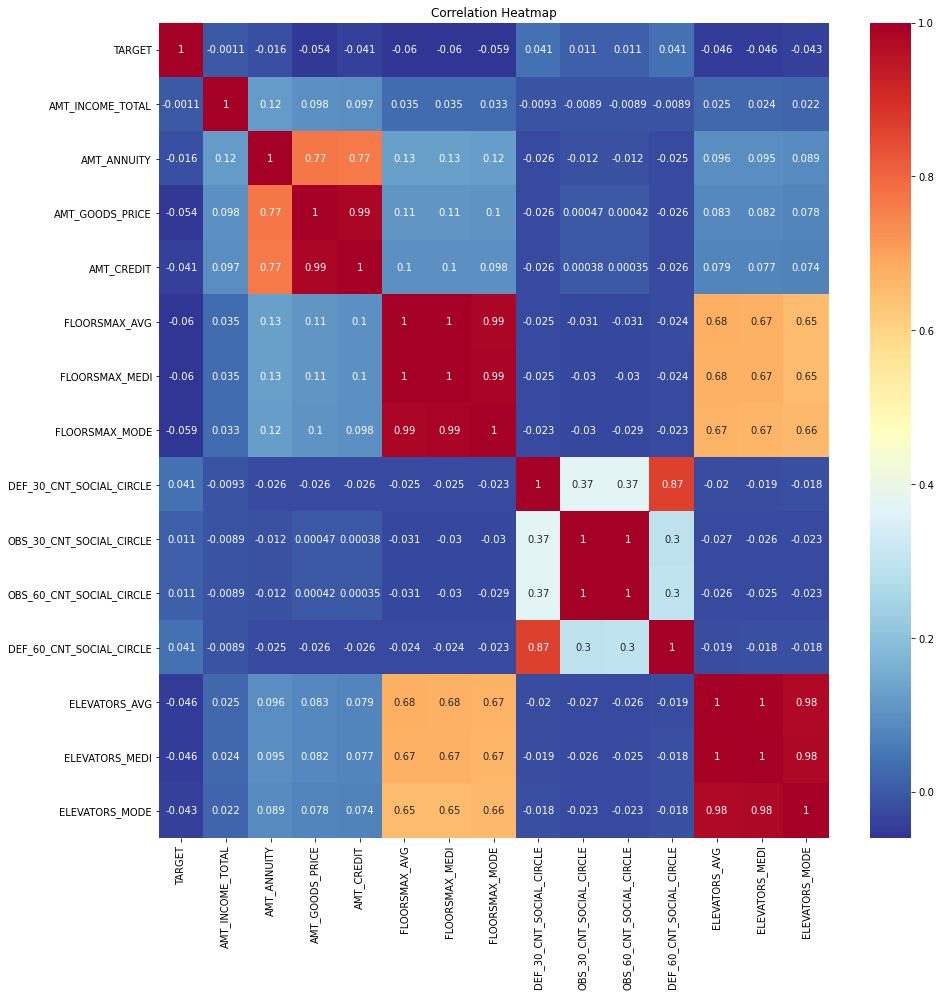

In [21]:
import seaborn as sns

plt.figure(figsize=(15,15))
correlated_data = modified_train_df[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT',\
                                   'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',\
                                   'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',\
                                   'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE']]

correlated_data = correlated_data.corr()
sns.heatmap(correlated_data, cmap=plt.cm.RdYlBu_r, annot=True)
plt.title('Correlation Heatmap');

According to the heatmap, the following pairs are highly correlated:
- 'AMT_GOODS_PRICE' and 'AMT_CREDIT'
- 'FLOORSMAX_MEDI' and 'FLOORSMAX_MODE'
- 'FLOORSMAX_MEDI' and 'FLOORSMAX_AVG'
- 'OBS_30_CNT_SOCIAL_CIRCLE' and 'OBS_60_CNT_SOCIAL_CIRCLE'
- 'DEF_30_CNT_SOCIAL_CIRCLE' and 'DEF_60_CNT_SOCIAL_CIRCLE'
- 'ELEVATORS_MEDI' and 'ELEVATORS_MODE'
- 'ELEVATORS_MEDI' and 'ELEVATORS_AVG'

Therefore, one feature of each pair will be removed to avoid redundancy in the dataset. Below is a list a features to be dropped from the dataset.

In [22]:
# Colinear features to be removed from the dataset
colinear = ['AMT_GOODS_PRICE', 'FLOORSMAX_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'ELEVATORS_MEDI']

In [23]:
def removing_colinear(data):
    # List of colinear columns to be removed
    colinear = ['AMT_GOODS_PRICE', 'FLOORSMAX_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'ELEVATORS_MEDI']
    data.drop(colinear, 1, inplace=True)
    
    return data

### 3.4 Label Encoding

Label encoding is a common techniques which is usually applied for categorical columns with 2 unique values. Therefore, we only choose columns with 2 categories to apply label encoding by using Scikit-Learn's LabelEncoder class. As recommended by Géron (2019), the encoder object is fit to the training data only and then it will be used to transform both the training set and test set.

In [24]:
# Number of unique values in each categorical column
cat_features = modified_train_df.select_dtypes('object')
cat_features.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [25]:
def label_encoding(traindata, testdata):
    categorical_features_train = traindata.select_dtypes('object')
    bin_cat_train_df = categorical_features_train.loc[:, categorical_features_train.nunique() == 2]
    bin_cat_train_list = bin_cat_train_df.columns.tolist()
    
    l_encoder = LabelEncoder()
    for column in bin_cat_train_list:
        traindata[column] = l_encoder.fit_transform(traindata[column])
        testdata[column] = l_encoder.transform(testdata[column])

    return traindata, testdata

### 3.5 One Hot Encoding

Columns with more than two categories will be encoded with Scikit-Learn's OneHotEncoder. 

In [26]:
def OH_encoding(traindata, testdata):
    categorical_features_train = traindata.select_dtypes('object')
    multi_cat_train_list = categorical_features_train.columns.tolist()
    
    categorical_features_test = testdata.select_dtypes('object')
    multi_cat_test_list = categorical_features_test.columns.tolist()
    
    # Inititate an instance of OneHotEncoder class
    oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
    # Transform feature columns with OneHotEncoder (Output is an array)
    oh_encoded_train_array = oh_encoder.fit_transform(traindata[multi_cat_train_list])
    
    oh_encoded_test_array = oh_encoder.transform(testdata[multi_cat_test_list])
    
    # Convert the encoded array to df
    oh_encoded_train_df = pd.DataFrame(oh_encoded_train_array, index=traindata.index)
    oh_encoded_train_df.columns = oh_encoder.get_feature_names(multi_cat_train_list)
    
    oh_encoded_test_df = pd.DataFrame(oh_encoded_test_array, index=testdata.index)
    oh_encoded_test_df.columns = oh_encoder.get_feature_names(multi_cat_train_list)
    
    #Extract only the columns that didnt need to be encoded from original df
    other_train_cols_df = traindata.drop(columns=multi_cat_train_list)
    
    other_test_cols_df = testdata.drop(columns=multi_cat_test_list)
    
    #Concatenate the two dataframes : 
    oh_traindata = pd.concat([other_train_cols_df, oh_encoded_train_df], axis=1)
    oh_testdata = pd.concat([other_test_cols_df, oh_encoded_test_df], axis=1)
    
    return oh_traindata, oh_testdata

### 3.6 Feature Scaling

Since we cannot perform any transformation on the output columns (i.e., 'AMT_INCOME_TOTAL' for part 1, and 'TARGET' for part 2), we will only apply feature scaling for part 2 considering the range of values in those output columns. Similar to the encoder object, the scaler is only fit to the training set and then it will be used to transform both the training set and test set.

In [27]:
from sklearn.preprocessing import StandardScaler

def scaling_features(traindata, testdata):
    std_scaler = StandardScaler()
    X_train = std_scaler.fit_transform(traindata)
    X_test = std_scaler.transform(testdata)
    
    X_train = pd.DataFrame(X_train, columns = traindata.columns)
    X_test = pd.DataFrame(X_test,columns = testdata.columns)
    
    return X_train, X_test

In [28]:
processed_train_data, processed_test_data = handling_missing_values(train_data, test_data)

processed_train_data = handling_outliers(processed_train_data)
processed_train_data = removing_colinear(processed_train_data)

processed_test_data = handling_outliers(processed_test_data)
processed_test_data = removing_colinear(processed_test_data)

label_encoded_train, label_encoded_test = label_encoding(processed_train_data, processed_test_data)
oh_encoded_train, oh_encoded_test = OH_encoding(label_encoded_train, label_encoded_test)

print(oh_encoded_train.shape)
print(oh_encoded_test.shape)

(108000, 211)
(12000, 211)


## 4. FEATURE SELECTION FOR PART 1

There are numerous approaches when it comes to feature selection. In this particular assignment, we will select the features based on two methods: Pearson's correlation coefficient and Random Forest Importance. The process of selecting features invloves the following steps:
- Determine best features based on Pearson's R (f_regression function)
- Determine best features based on Random Forest Importance (RandomForestRegressor)
- Perform training and evaluating a base model (Linear Regression) with all features
- Perform training and evaluating the model with selected features
- Choose a set of features that results in the best performance

It is noted that the training and evaluation will be performed on the training set only. Therefore, we will be need to split the training set into train and validation sets with a ratio of 80:20.

First, we need to separate the input and output data for both training and test set

In [29]:
X_train_part1 = oh_encoded_train.drop(['AMT_INCOME_TOTAL', 'SK_ID_CURR'], 1)
Y_train_part1 = oh_encoded_train['AMT_INCOME_TOTAL']

X_test_part1 = oh_encoded_test.drop(['AMT_INCOME_TOTAL', 'SK_ID_CURR'], 1)
Y_test_part1 = oh_encoded_test['AMT_INCOME_TOTAL']

### 4.1 Pearson's R

Define a function to select the best features based on Pearson's correlation coefficient, which utilises SelectKBest class from Scikit-Learn.

In [30]:
def feature_Pearson(X_train, Y_train, X_val, num_features):  
    # Configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=num_features)
    # Fit model from training data
    fs.fit(X_train, Y_train)
    # Transform training input data
    X_train_fs = fs.transform(X_train)
    # Transform validation input data
    X_val_fs = fs.transform(X_val)
    return X_train_fs, X_val_fs, fs

### 4.2 Random Forest Importance

Define a function to select best features based on Random Forest Importance. The number of decision trees used in this model is 100 and the max_feature parameter is set to 'sqrt' which is a square root of the number of features.

In [31]:
def feature_RFI_reg(X_train, Y_train, num_features):
    model_rfi = RandomForestRegressor(max_features='sqrt', n_estimators=100)
    model_rfi.fit(X_train, Y_train)

    fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

    best_features_rfi = X_train.columns[fs_indices_rfi].values
    feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
    
    return best_features_rfi, feature_importances_rfi

### 4.3 Base Model with All Features

Linear Regression is chosen as a base model. The function below is to train and evaluate the model based on the training set and validation set.

In [32]:
def feature_LinearRegression(X_train, Y_train, X_test, Y_test):  
    #Fit the model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)
    
    #Evaluate the model
    Y_predicted = lin_reg.predict(X_test)
    
    # Evaluate the predictions
    MSE = mean_squared_error(Y_test, Y_predicted)
    r, p_value = stats.pearsonr(Y_test, Y_predicted)
    print('Linear Regression metrics:')
    print(f'MSE: {MSE:.2f}')
    print(f'Pearson\'s correlation: {r:.2f}')

In [33]:
# Split the training set into train set and validation set
X_train_p1, X_val_p1, Y_train_p1, Y_val_p1 = train_test_split(X_train_part1, Y_train_part1, test_size=0.2, random_state=1)

# Evaluate the base model with all features
feature_LinearRegression(X_train_p1, Y_train_p1, X_val_p1, Y_val_p1)

Linear Regression metrics:
MSE: 8961566604.39
Pearson's correlation: 0.53


### 4.4 Model with Selected Features

#### Features selected with Pearson's R

In this section, we will evaluate the base model with different number of features selected from Pearson's correlation.

In [34]:
import warnings
warnings.filterwarnings('ignore')

for nb_features in [25, 50, 75, 100]:
    print('Number of selected features are:', nb_features)
    X_train_pearson, X_val_pearson, pearson = feature_Pearson(X_train_p1, Y_train_p1, X_val_p1, nb_features)
    feature_LinearRegression(X_train_pearson, Y_train_p1, X_val_pearson, Y_val_p1)
    print()

Number of selected features are: 25
Linear Regression metrics:
MSE: 9216292781.48
Pearson's correlation: 0.51

Number of selected features are: 50
Linear Regression metrics:
MSE: 9113209437.19
Pearson's correlation: 0.52

Number of selected features are: 75
Linear Regression metrics:
MSE: 9039445739.53
Pearson's correlation: 0.52

Number of selected features are: 100
Linear Regression metrics:
MSE: 8965018156.98
Pearson's correlation: 0.53



#### Features selected with Random Forest Importance

Next, we will evaluate the base model with different number of features selected from Random Forest Importance.

In [35]:
for nb_features in [25, 50, 75, 100]:
    print('Number of selected features are:', nb_features)
    best_rfi_reg, importances_rfi_reg = feature_RFI_reg(X_train_part1, Y_train_part1, nb_features)
    selected_features_rfi_reg = best_rfi_reg.tolist()
    feature_LinearRegression(X_train_p1[selected_features_rfi_reg], Y_train_p1, X_val_p1[selected_features_rfi_reg], Y_val_p1)
    print()

Number of selected features are: 25
Linear Regression metrics:
MSE: 9834230616.43
Pearson's correlation: 0.46

Number of selected features are: 50
Linear Regression metrics:
MSE: 9192013832.82
Pearson's correlation: 0.51

Number of selected features are: 75
Linear Regression metrics:
MSE: 9040056211.08
Pearson's correlation: 0.52

Number of selected features are: 100
Linear Regression metrics:
MSE: 9005205874.67
Pearson's correlation: 0.53



### 4.5 Final Selected Features

Below is a summary table of how the Linear Regression performs with different number of features as carried out in section 4.3 and 4.4. As shown in the table, the correlation of features selected by Pearson's R is higher than one selected by Random Forest Importance (RFI) when the number of features is 25; however, the correlations from both methods take on the same values when the number of features is 100. Based on the correlation metric and the time required to train for each method, it is evident that Person's R selected features provide a better performance and the number of features chosen is 80 at which the correlation will be the same as the base model.

| Model | Number of Features | Peason's Correlation |
| :--- | :---: | :---: |
| Base Model (Linear Regression) | All | 0.53 |
| Model with Pearson's R Selected Features | 25 | 0.51 |
|  | 50 | 0.52 |
|  | 75 | 0.52 |
|  | 100 | 0.53 |
| Model with RFI Selected Features | 25 | 0.45 |
|  | 50 | 0.51 |
|  | 75 | 0.52 |
|  | 100 | 0.53 |

In [36]:
X_train_pearson, X_val_pearson, pearson = feature_Pearson(X_train_p1, Y_train_p1, X_val_p1, 80)
feature_LinearRegression(X_train_pearson, Y_train_p1, X_val_pearson, Y_val_p1)

Linear Regression metrics:
MSE: 8981022591.83
Pearson's correlation: 0.53


The final list of selected features can be obtained from the code below.

In [37]:
filter_p1 = pearson.get_support()
features_list_p1 = np.array(X_train_p1.columns.tolist())
selected_features_p1 = features_list_p1[filter_p1].tolist()

It is noted that after performing further experience with training and hyperparameter tuning, the final model is adopted for part 1 is Ridge Regression which is a regularised version of Linear Regression. It has proven to be performed better (less training time) and achieves slightly higher correlation value on the test set.

## 5. FEATURE SELECTION FOR PART 2

Similar to part 1, the approach for feature selection in part 2 would involve the following steps:
- Determine best features based on ANOVA (using f_classif function)
- Determine best features based on Random Forest Importance (using RandomForestClassifier)
- Perform training and evaluating a base model (Logistic Regression) with all features
- Perform training and evaluating the model with selected features
- Choose a set of features that results in the best performance

The training set is also split into train and validation sets with a ratio of 80:20 during this process.

In [38]:
X_train_part2 = oh_encoded_train.drop(['TARGET', 'SK_ID_CURR'], 1)
Y_train_part2 = oh_encoded_train['TARGET']

X_test_part2 = oh_encoded_test.drop(['TARGET', 'SK_ID_CURR'], 1)
Y_test_part2 = oh_encoded_test['TARGET']

In [39]:
X_train_part2_scaled, X_test_part2_scaled = scaling_features(X_train_part2, X_test_part2)

### 5.1 ANOVA

Define a function to select the best features based on ANOVA (f_classif function), which utilises SelectKBest class from Scikit-Learn.

In [40]:
# Feature selection with ANOVA (f_classif)
def feature_ANOVA(X_train, Y_train, X_val, num_features):
    # Configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=num_features)
    
    # Learn relationship from training data
    fs.fit(X_train, Y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_val_fs = fs.transform(X_val)
    return X_train_fs, X_val_fs, fs

### 5.2 Random Forest Importance

Define a function to select best features based on Random Forest Importance. The number of decision trees used in this model is 100 and the max_feature parameter is set to 'sqrt' which is a square root of the number of features.

In [41]:
def feature_RFI_clf(X_train, Y_train, num_features):
    model_rfi = RandomForestClassifier(max_features='sqrt', n_estimators=100)
    model_rfi.fit(X_train, Y_train)

    fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

    best_features_rfi = X_train.columns[fs_indices_rfi].values
    feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
    
    return best_features_rfi, feature_importances_rfi

### 5.3 Base Model with All Features

Logistic Regression is chosen as a base model. The function below is to train and evaluate the model based on the training set and validation set.

In [42]:
def feature_LogisticRegression(X_train, Y_train, X_test, Y_test):  
    #Fit the model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, Y_train)
    
    #Evaluate the model
    Y_predicted = log_reg.predict(X_test)
    
    # Evaluate the predictions
    target_names = ['class 0', 'class 1']
    print(classification_report(Y_test, Y_predicted, target_names=target_names))

    accuracy = accuracy_score(Y_test, Y_predicted)
    avg_precision = precision_score(Y_test, Y_predicted, average='macro')
    avg_recall = recall_score(Y_test, Y_predicted, average='macro')
    avg_f1score = f1_score(Y_test, Y_predicted, average='macro')

    print(f'Average precision: {avg_precision:.3f}')
    print(f'Average recall: {avg_recall:.3f}')
    print(f'F1-Score: {avg_f1score:.3f}')
    print(f'Accuracy: {accuracy:.3f}')

In [43]:
X_train_p2, X_val_p2, Y_train_p2, Y_val_p2 = train_test_split(X_train_part2_scaled, Y_train_part2, test_size=0.2, random_state=1)
feature_LogisticRegression(X_train_p2, Y_train_p2, X_val_p2, Y_val_p2)

              precision    recall  f1-score   support

     class 0       0.85      0.98      0.91     18107
     class 1       0.52      0.10      0.16      3493

    accuracy                           0.84     21600
   macro avg       0.69      0.54      0.54     21600
weighted avg       0.80      0.84      0.79     21600

Average precision: 0.686
Average recall: 0.540
F1-Score: 0.538
Accuracy: 0.840


### 5.4 Model with Selected Features

#### Features selected with ANOVA

The base model is evaluated with different number of features selected from ANOVA.

In [44]:
for nb_features in [25, 50, 75, 100]:
    print('Number of selected features are:', nb_features)
    X_train_anova, X_val_anova, anova = feature_ANOVA(X_train_p2, Y_train_p2, X_val_p2, nb_features)
    feature_LogisticRegression(X_train_anova, Y_train_p2, X_val_anova, Y_val_p2)
    print()

Number of selected features are: 25
              precision    recall  f1-score   support

     class 0       0.85      0.99      0.91     18107
     class 1       0.53      0.08      0.14      3493

    accuracy                           0.84     21600
   macro avg       0.69      0.53      0.52     21600
weighted avg       0.80      0.84      0.79     21600

Average precision: 0.688
Average recall: 0.532
F1-Score: 0.524
Accuracy: 0.840

Number of selected features are: 50
              precision    recall  f1-score   support

     class 0       0.85      0.99      0.91     18107
     class 1       0.52      0.08      0.14      3493

    accuracy                           0.84     21600
   macro avg       0.69      0.53      0.53     21600
weighted avg       0.80      0.84      0.79     21600

Average precision: 0.685
Average recall: 0.535
F1-Score: 0.528
Accuracy: 0.839

Number of selected features are: 75
              precision    recall  f1-score   support

     class 0       0.85

#### Features selected with Random Forest Importance

The base model is evaluated with different number of features selected from Random Forest Importance.

In [45]:
for nb_features in [25, 50, 75, 100]:
    print('Number of selected features are:', nb_features)
    best_rfi_clf, importances_rfi_clf = feature_RFI_clf(X_train_p2, Y_train_p2, nb_features)
    selected_features_rfi_clf = best_rfi_clf.tolist()
    feature_LogisticRegression(X_train_p2[selected_features_rfi_clf], Y_train_p2, X_val_p2[selected_features_rfi_clf], Y_val_p2)
    print()

Number of selected features are: 25
              precision    recall  f1-score   support

     class 0       0.85      0.99      0.91     18107
     class 1       0.53      0.07      0.12      3493

    accuracy                           0.84     21600
   macro avg       0.69      0.53      0.52     21600
weighted avg       0.80      0.84      0.78     21600

Average precision: 0.688
Average recall: 0.528
F1-Score: 0.516
Accuracy: 0.840

Number of selected features are: 50
              precision    recall  f1-score   support

     class 0       0.85      0.99      0.91     18107
     class 1       0.53      0.08      0.14      3493

    accuracy                           0.84     21600
   macro avg       0.69      0.53      0.52     21600
weighted avg       0.80      0.84      0.79     21600

Average precision: 0.688
Average recall: 0.533
F1-Score: 0.525
Accuracy: 0.840

Number of selected features are: 75
              precision    recall  f1-score   support

     class 0       0.85


### 5.5 Final Selected Features

Table below summaries the model performance (using accuracy and F1-score metrics) carried out in section 5.3 and 5.4. It can be seen that even though the features selected by both methods have similar accuracy, the ones selected by ANOVA has slightly higher F1-score values than the ones selected by Random Forest Importance. Therefore, considering the imbalanced characteristic of the dataset, it is reasonable to choose ANOVA features with the number of features of 75 of which the performance is relatively as good as the base model.

| Model | Number of Features | Accuracy | F1-Score |
| :--- | :---: | :---: | :---: |
| Base Model (Logistic Regression) | All | 0.840 | 0.538 |
| Model with ANOVA Selected Features | 25 | 0.840 | 0.524 |
|  | 50 | 0.839 | 0.528 |
|  | 75 | 0.841 | 0.536 |
|  | 100 | 0.841 | 0.539 |
| Model with RFI Selected Features | 25 | 0.840 | 0.516 |
|  | 50 | 0.839 | 0.528 |
|  | 75 | 0.840 | 0.532 |
|  | 100 | 0.840 | 0.533 |

In [46]:
X_train_anova, X_val_anova, anova = feature_ANOVA(X_train_p2, Y_train_p2, X_val_p2, 75)
feature_LogisticRegression(X_train_anova, Y_train_p2, X_val_anova, Y_val_p2)

              precision    recall  f1-score   support

     class 0       0.85      0.98      0.91     18107
     class 1       0.54      0.09      0.16      3493

    accuracy                           0.84     21600
   macro avg       0.70      0.54      0.54     21600
weighted avg       0.80      0.84      0.79     21600

Average precision: 0.696
Average recall: 0.539
F1-Score: 0.536
Accuracy: 0.841


The final list of selected features can be obtained from the code below.

In [47]:
filter_p2 = anova.get_support()
features_list_p2 = np.array(X_train_p2.columns.tolist())
selected_features_p2 = features_list_p2[filter_p2].tolist()

It is noted that after performing further experience with training and hyperparameter tuning, the final model is adopted for part 2 is Gradient Boosting Classifier because it proves to perform better and achieves slightly higher accuracy on the test set.

---

### REFERENCES

1. Al-Banna, M 2022, Week 7: Classification & Week 8: Linear Regression, COMP9321 Data Services Engineering, Faculty of Engineering, School of Computer Science and Engineering, UNSW.
2. Géron, A 2019, Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition, O’Reilly Media, Inc., Sebastopol, California, USA.
3. https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/
4. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#7559
5. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/